## Cenditya Ayu Aurelia
## Kelas Fibonacci
## NPM 20083010023
## Ujian Praktik Computer Vision

# 1. Importing Packages

Import packages library terlebih dahulu yang akan digunakan

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
from keras.utils import to_categorical
from keras.layers import Convolution2D , MaxPooling2D , Dense , Dropout , Flatten

# 2. Import Dataset

Import dataset 4-animal-classification yang sudah didownload melalui [disini](https://www.kaggle.com/competitions/4-animal-classification/data). Setelah itu, import dataset yang sudah didownload dalam satu direktori file yang akan dijalankan program jupyternya dengan menggunakan path dari penyimpanan dataset.

In [2]:
path = 'C:/Users/Cenditya Ayu Aurelia/Documents/MSIB/Computer Vision/Uprak/4-animal-classification'

# 2. Visualisasi Data

Selanjutnya melakukan visualisasi data dengan menggunakan Bar Chart untuk menampilkan visualisasi data Animal Classification pada data train.

In [3]:
# Menampilkan banyaknya gambar dari setiap kelas pada data train
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,cat,700
1,deer,600
2,dog,900
3,horse,600


Dari output diatas, menampilkan banyaknya gambar dari setiap kelas yang terdapat pada dataset train

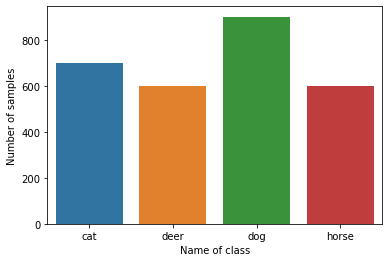

In [4]:
# Melakukan visualisasi dataset pada data train
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

Dari grafik diatas menampilkan visualisasi data dalam bentuk Bar Chart. Berdasarkan grafik tersebut menunjukkan bahwa data tertinggi dari keempat kelas dimiliki oleh kelas Dog dengan sebanyak 900 gambar, lalu kelas Cat sebanyak 700 gambar, kelas Deer dan Horse sebanyak 600 gambar.

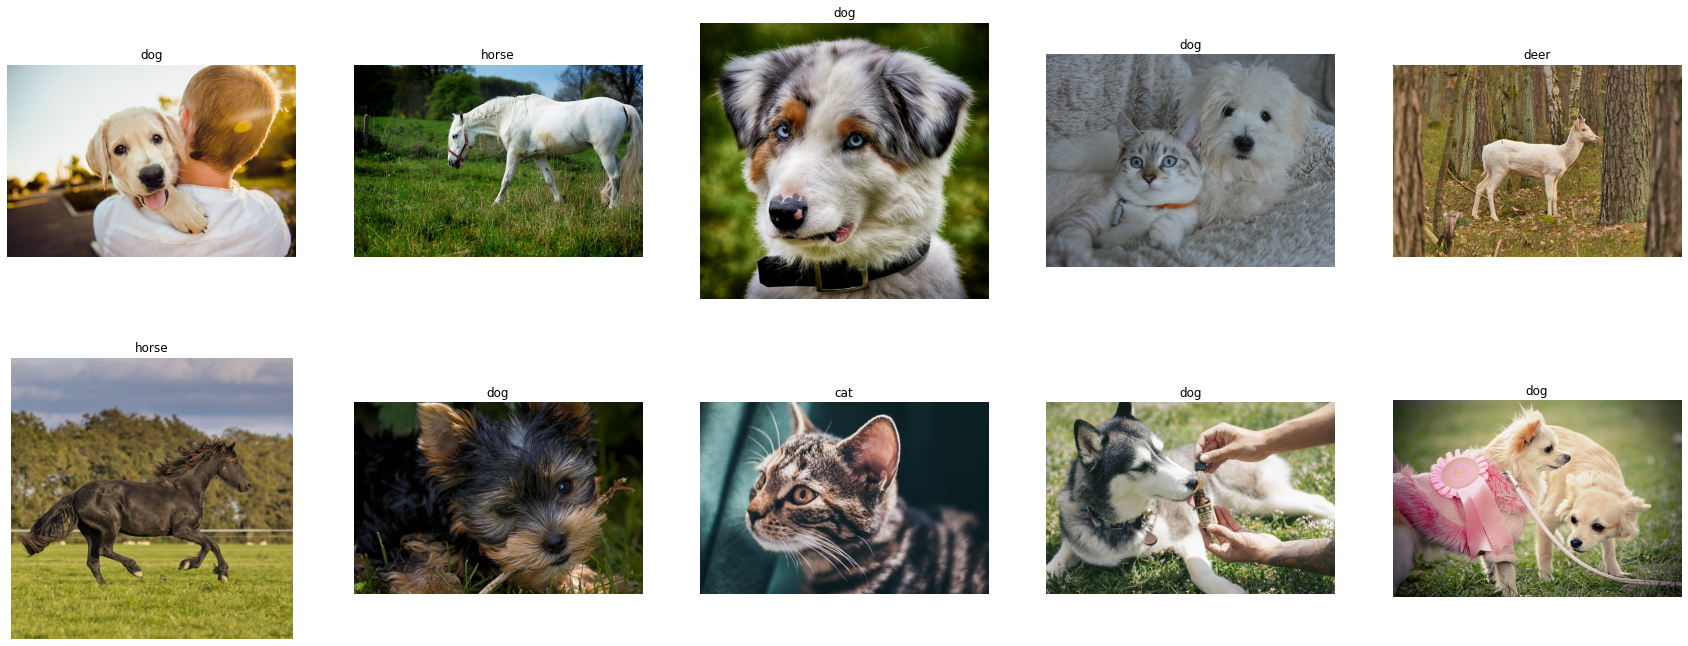

In [5]:
# Menampilkan random images dari train set
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show() 

Dari gambar diatas merupakan hasil prediksi random images dari train set dengan memberikan label class pada setiap gambar yang dilakukan pendeteksian gambar.

# 3. Preparing the data

Sebelum melakukan building the model harus melakukan preprocessing data terlebih dahulu agar siap untuk diolah dengan tujuan meminimalkan kesalahan dan mengoptimalkan model yang akan dihasilkan.

In [6]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

Dari kode diatas menggunakan `keras.preprocessing.image.ImageDataGenerator` class sangat penting untuk melakukan normalize data karena data akan diproses untuk improve performance secara keseluruhan. Parameter `rescale` digunakan untuk scale image pixel values yaitu 1./255 dengan width shift range dan height shift range yaitu 0.2. Validation split yang digunakan pada metode ImageDataGenerator adalah 0.2.

In [7]:
# Flow training images in batches of 32 using train_ds
train_ds = image_datagen.flow_from_directory(
        path+'/train', # Direktori sumber untuk melakukan training images
        subset='training',
        target_size=(224 , 224), # Semua gambar akan diubah ukurannya menjadi 224x224
        batch_size=32)

# Flow validation images in batches of 32 using train_ds
val_ds = image_datagen.flow_from_directory(
        path+'/train', # Direktori sumber untuk melakukan training images
        subset='validation',
        target_size=(224 , 224), # Semua gambar akan diubah ukurannya menjadi 224x224
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


Dari output diatas, menunjukkan bahwa terdapat 2240 gambar dari 4 kelas pada train ds. Lalu terdapat 560 gambar dari 4 kelas pada validation ds.

# 4. Building the model

Selanjutnya menambahkan layering untuk menentukan model Sequential dengan menggunakan Conv2D dan MobileNet.

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           input_shape = (200, 200, 3),
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2) ),
                                    tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                    tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2),
                                                           activation='relu', padding = 'same',
                                                           kernel_initializer='he_normal',
                                                           bias_initializer='zeros'),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [24]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 4608)             

Dari output diatas terdapat kolom "output shape" yang berfungsi untuk menampilkan transformasi dari setiap dimensi layer sebagai hasil dari convolution dan max pooling - convolution yang akan mengurangi layer size sedikit karena proses padding, dan max pooling membagi 2 output size. 

In [9]:
# Menambahkan accuracy pada metrics yang terdapat pada model sequential
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy']) 

Berdasarkan kode diatas dilakukan untuk menambahkan accuracy pada metrics yang terdapat pada model sequential dengan melakukan train model dengan `binary_crossentropy` loss dan `Adam` optimizer yang merupakan sensible optimization algorithm karena dapat melakukan automasi learning-rate tuning. Model tersebut akan memonitor accuracy saat melakukan training. 

In [10]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [11]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                

Berdasarkan kode diatas dilakukan untuk menambahkan accuracy pada metrics yang terdapat pada model sequential dengan melakukan train model dengan `categorical_crossentropy` loss dan `SGD` optimizer dengan learning_rate = 0.0005 dan momentum = 0.9.

# 5. Training and evaluating

Melakukan training dan evaluating untuk melihat nilai loss, val loss, accuracy, val accuracy pada model.

In [12]:
# Melakukan training dengan 40 epochs
history = model.fit(train_ds , validation_data = val_ds , epochs = 40)

Epoch 1/40
70/70 [==============================] - 603s 9s/step - loss: 0.9146 - accuracy: 0.6513 - val_loss: 0.4712 - val_accuracy: 0.8500
Epoch 2/40
70/70 [==============================] - 498s 7s/step - loss: 0.3574 - accuracy: 0.8951 - val_loss: 0.2961 - val_accuracy: 0.9179
Epoch 3/40
70/70 [==============================] - 460s 7s/step - loss: 0.2370 - accuracy: 0.9241 - val_loss: 0.2314 - val_accuracy: 0.9304
Epoch 4/40
70/70 [==============================] - 642s 9s/step - loss: 0.2051 - accuracy: 0.9339 - val_loss: 0.1968 - val_accuracy: 0.9411
Epoch 5/40
70/70 [==============================] - 473s 7s/step - loss: 0.1466 - accuracy: 0.9567 - val_loss: 0.1702 - val_accuracy: 0.9518
Epoch 6/40
70/70 [==============================] - 437s 6s/step - loss: 0.1267 - accuracy: 0.9621 - val_loss: 0.1763 - val_accuracy: 0.9464
Epoch 7/40
70/70 [==============================] - 1228s 18s/step - loss: 0.1161 - accuracy: 0.9656 - val_loss: 0.1545 - val_accuracy: 0.9464
Epoch 8/40


18/18 [==============================] - 29s 2s/step - loss: 0.1327 - accuracy: 0.9607


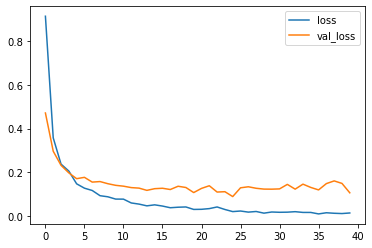

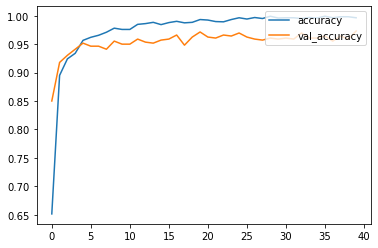

In [13]:
# Melakukan evaluasi accuracy model
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()


plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

Setelah melakukan train model pada model Sequential dengan “categorical_crossentropy” loss dan “SGD optimizer “ learning rate = 0.0005, momentum = 0.9, dan epochs sebanyak 40 maka diperoleh akurasi sebesar 0.9607 dan nilai loss sebesar 0.1327.

# 6. Preparing for submission

In [14]:
# Menampilkan file Sample_submission.csv pada data test
sub_csv ='C:/Users/Cenditya Ayu Aurelia/Documents/MSIB/Computer Vision/Uprak/4-animal-classification/Sample_submission.csv'
path_test = 'C:/Users/Cenditya Ayu Aurelia/Documents/MSIB/Computer Vision/Uprak/4-animal-classification/test/test'

In [15]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


Dari output diatas menampilkan ID dan label dengan label digunakan untuk mendeteksi gambar. Namun, hasil pendeteksi gambar tersebut masih bernilai 0. Maka dari itu, perlu dilakukan meninjau setiap gambar agar dapat menampilkan hasil prediksi gambar pada label.

In [16]:
# Meninjau setiap gambar secara individual dan disimpan dalam daftar yang kemudian digabungkan dengan ID korespondensinya

from tensorflow.keras.preprocessing.image import load_img


# Membuat daftar untuk melakukan prediksi
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 83ms/step


In [17]:
# Mengganti kolom sebelumnya dengan prediksi baru
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


Dari output diatas menampilkan hasil prediksi gambar sebagai ID dan label dengan ketentuan sebagai berikut :

1. Label 0 sebagai Cat
2. Label 1 sebagai Deer
3. Label 2 sebagai Dog
4. Label 3 sebagai Horse

In [18]:
# Menyimpan file
df_sub.to_csv('file_submission.csv',index=False)

## Kesimpulan
Berdasarkan model yang digunakan untuk mengklasifikasikan hewan pada model MobileNet dengan memasukkan epochs sebesar 40 diperoleh tingkat akurasi sebesar 0,9607 atau 96% dan nilai loss sebesar 0.1327 atau 13%. Akurasi yang dihasilkan dari model MobilNet sudah bagus sehingga dapat mengklasifikasikan 4 hewan dengan baik.